# Sampling Methods

In [1]:
import os, sys

src_path = os.path.abspath(os.path.join(os.getcwd(), "../"))
sys.path.insert(0, src_path)

import scripts.graph_utils as gru

In [2]:
G = gru.read_directed_graph_from_edge_list("../../data/tests/synthetic2.edges")

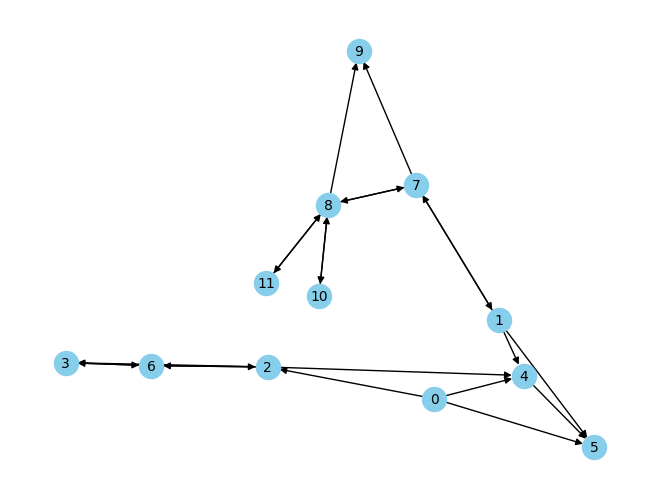

In [3]:
gru.draw_graph(G, seed=5)

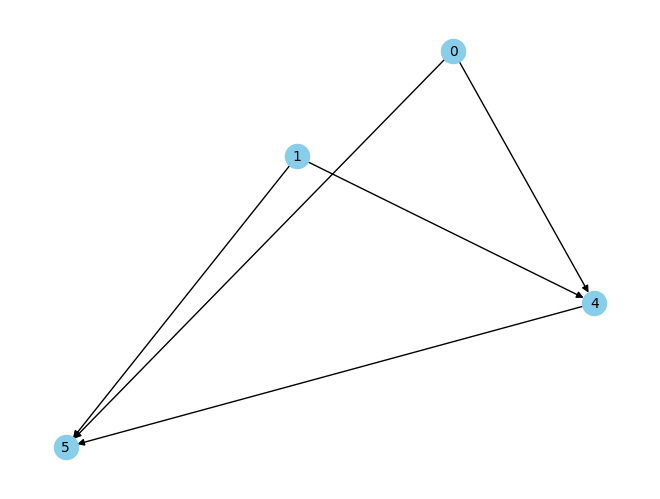

In [4]:
gru.draw_graph(gru.get_sample_rj(G, sample_percent=0.5))

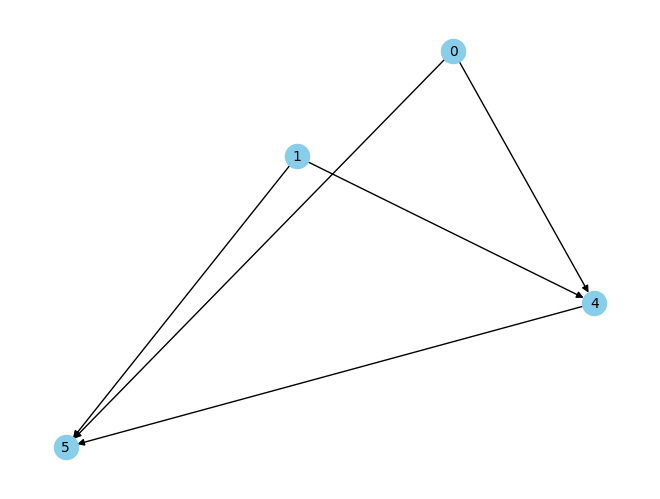

In [5]:
gru.draw_graph(gru.get_sample_rw(G, sample_percent=0.5))

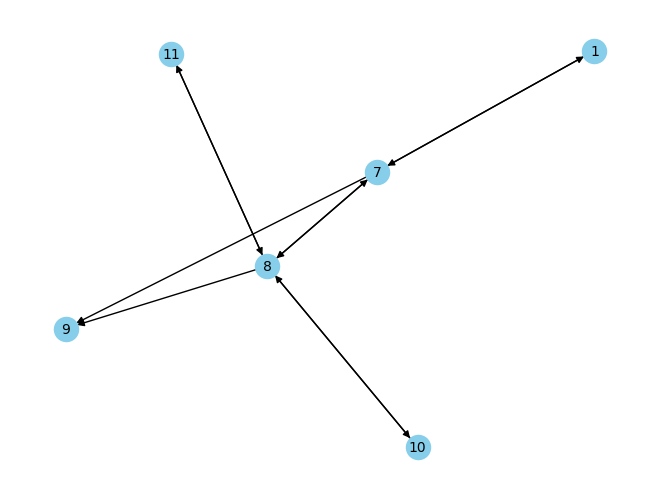

In [6]:
gru.draw_graph(gru.get_sample_sff(G, sample_percent=0.5))

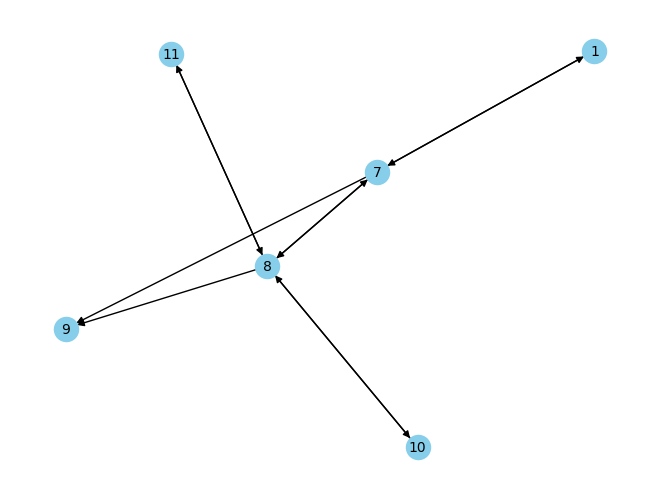

In [7]:
gru.draw_graph(gru.get_sample_ff(G, sample_percent=0.5))

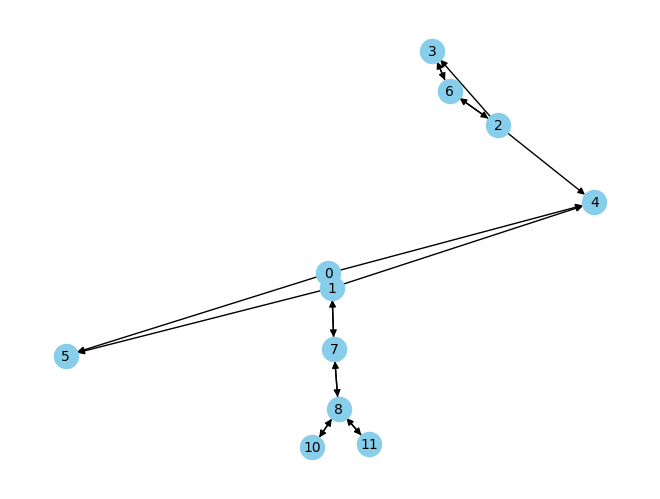

In [8]:
gru.draw_graph(gru.get_sample_drne(G, sample_percent=0.5))

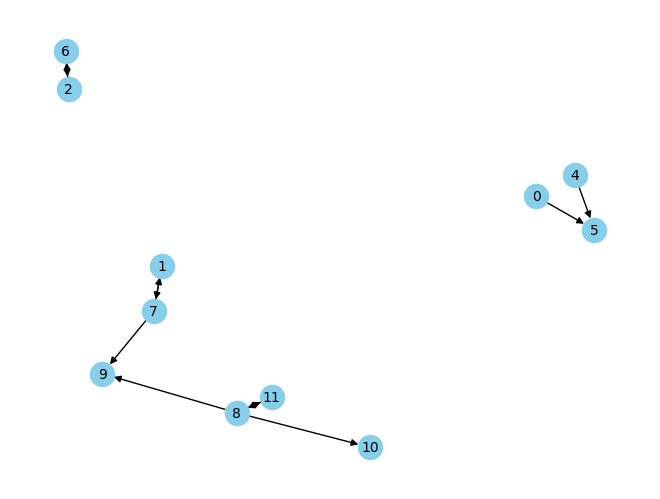

In [9]:
gru.draw_graph(gru.get_sample_dre(G, sample_percent=0.5))

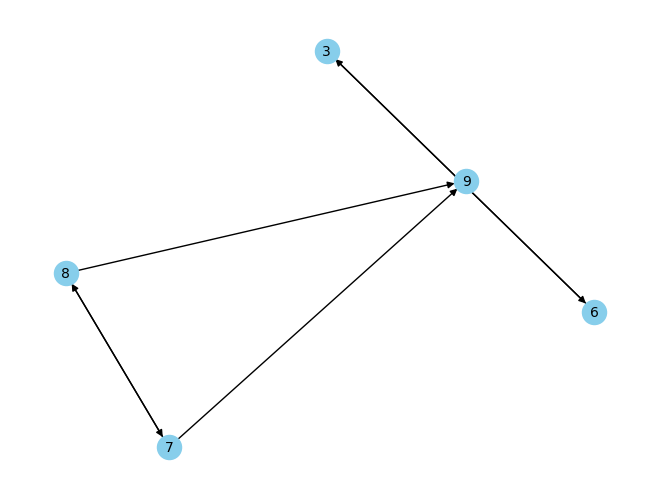

In [10]:
gru.draw_graph(gru.get_sample_drn(G, sample_percent=0.5))

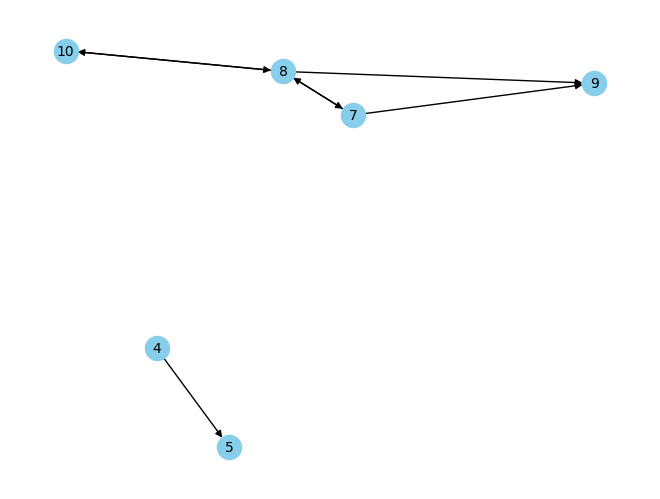

In [11]:
gru.draw_graph(gru.get_sample_dsf(G, sample_percent=0.5))

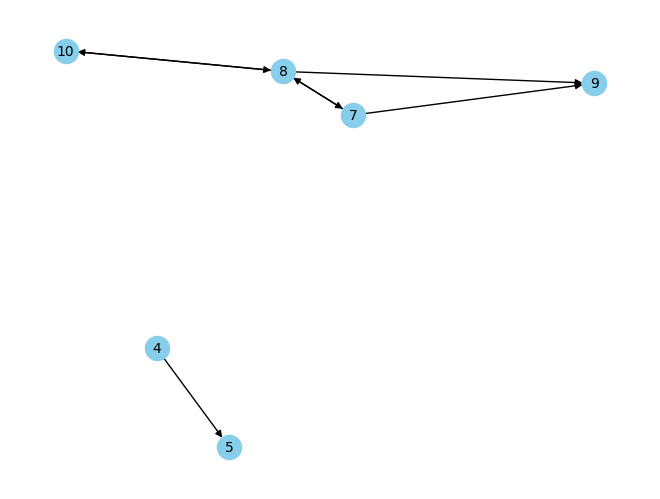

In [12]:
gru.draw_graph(gru.get_sample_bsf(G, sample_percent=0.5))

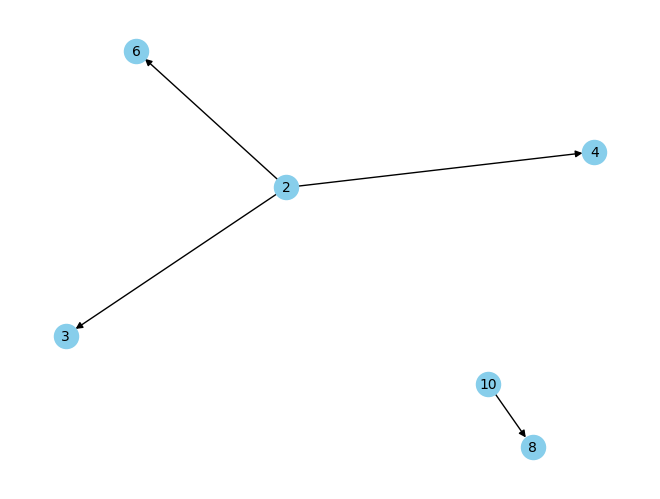

In [13]:
gru.draw_graph(gru.get_sample_rnn(G, sample_percent=0.5))

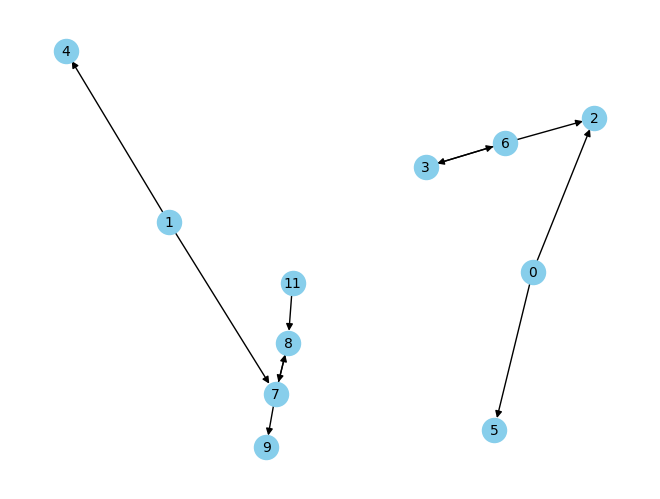

In [14]:
gru.draw_graph(gru.get_sample_hyb(G, sample_percent=0.5))

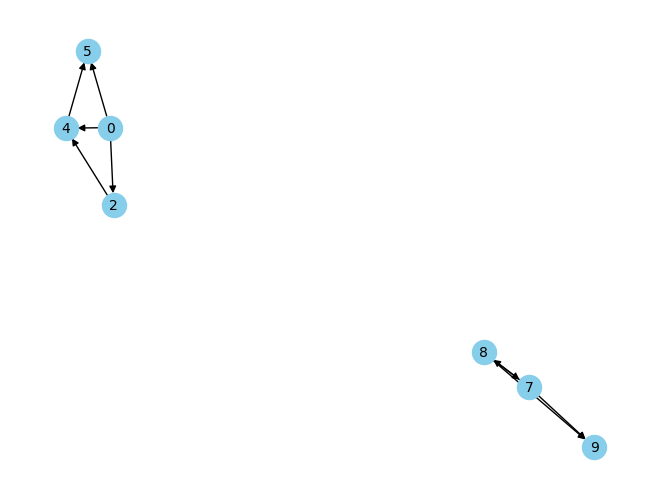

In [15]:
gru.draw_graph(gru.get_sample_rne(G, sample_percent=0.5))

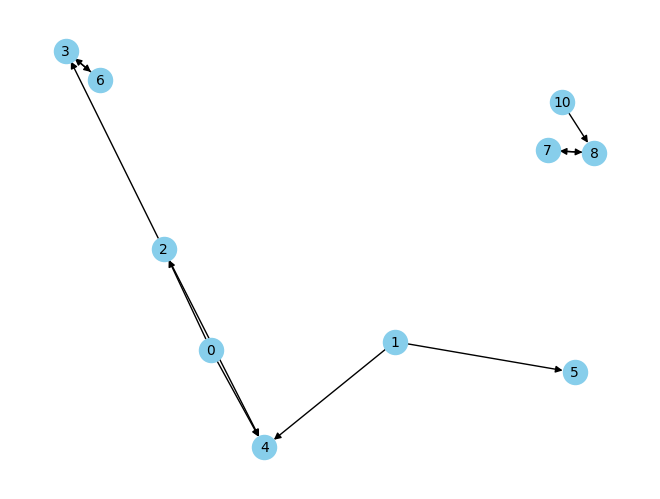

In [16]:
gru.draw_graph(gru.get_sample_re(G, sample_percent=0.5))

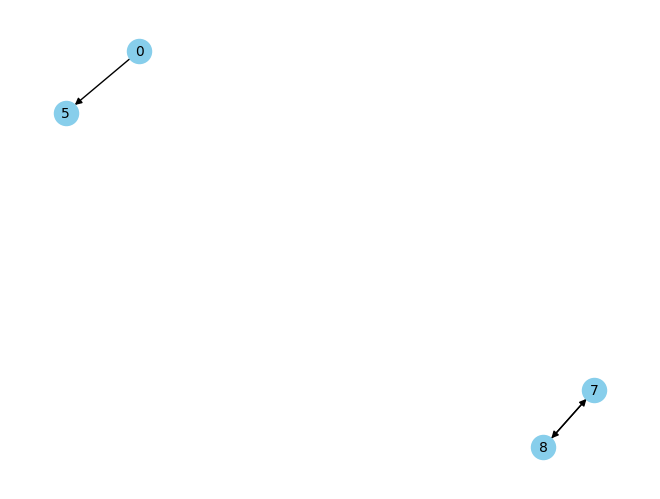

In [17]:
gru.draw_graph(gru.get_sample_rpn(G, sample_percent=0.5))

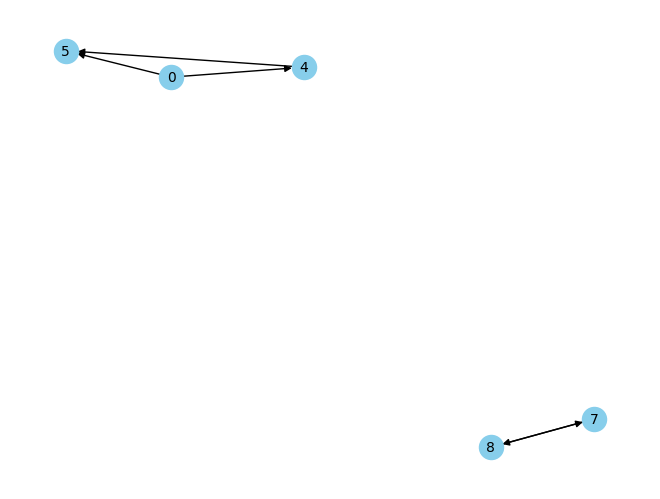

In [18]:
gru.draw_graph(gru.get_sample_rdn(G, sample_percent=0.5))

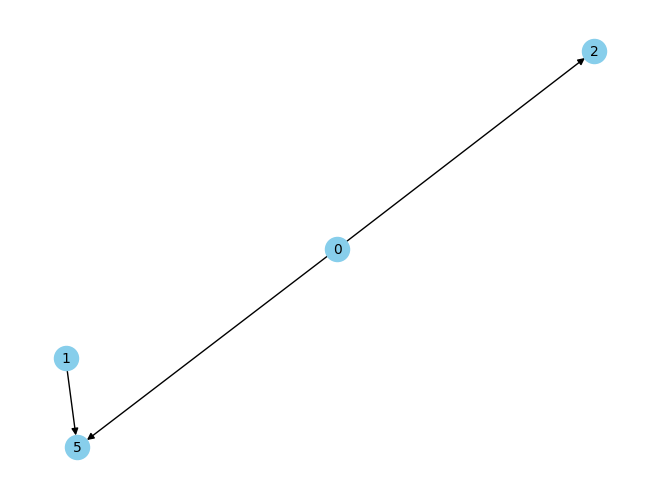

In [19]:
gru.draw_graph(gru.get_sample_rn(G, sample_percent=0.5))